<a href="https://colab.research.google.com/github/VictorNiaussat/DeepLearningAction/blob/main/Copie_de_Copie_de_RNN_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Recurrent Neural Networks**
The aim of this lab is to built a classification algorithms using LSTM and CNN on dynamic data. The lab is inspired on 'Advanced Data science, by Srivatsan Srinivasan, Pavlos Protopapas, Chris Tanner course' 

**Exercise 1**
we aim to perform sentiment classification on a movie review dataset. We would to build a convolutional neural net, a recurrent net and combine one or more of them to understand and compare performance of each of them. A sentence can be thought of as a sequence of words that collectively represent meaning. Individual words impact the meaning. Thus, the context matters; words that occur earlier in the sentence influence the sentence's structure and meaning in the latter part of the sentence (e.g., Jean asked Clara if she were going to the library today). Likewise, words that occur later in a sentence can affect the meaning of earlier words (e.g., Apple is an interesting company). 

In [ ]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, SimpleRNN
from keras.layers.embeddings import Embedding
from keras.layers import Flatten
from keras.preprocessing import sequence
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
import numpy as np
# fix random seed for reproducibility
numpy.random.seed(1)

In [ ]:
# We want to have a finite vocabulary to make sure that our word matrices are not arbitrarily small
vocabulary_size = 10000

# We also want to have a finite length of reviews and not have to process really long sentences.
max_review_length = 500

The embedding (seen in Transformer course) is a function representing each word by a unique number (integer) as it takes less memory than strings. There are an infinite number of ways to create such embeddings, and since these representations have such a great influence on the performance of our models, there has been an incredible amount of research dedicated to this very aspect. In general, though, one can view the embedding process as a linear projection from one vector space to another (e.g., a vector space of unique words being mapped to a world of fixed-length, dense vectors filled with continuous-valued numbers).

**Load data**

In [ ]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocabulary_size)
print('Number of reviews', len(X_train))
print('Length of first and fifth review before padding', len(X_train[0]) ,len(X_train[4]))
print('First review', X_train[0])
print('First label', y_train[0])

17473536/17464789 [==============================] - 0s 0us/step
Number of reviews 25000
Length of first and fifth review before padding 218 147
First review [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104,

**Preprocess data**
If RNN is trained on one sentence at a time, one can have sentences of varying lengths. However, it can be sometimes be advantageous to train inputs in batches. When doing so with RNNs, our input tensors need to be of the same length/dimensions. Thus, let's pad our sentences.

In [ ]:
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
print('Length of first and fifth review after padding', len(X_train[0]) ,len(X_train[4]))

Length of first and fifth review after padding 500 500


**Classification using CNN**
Text can be thought of as 1-dimensional sequence (a single, long vector) and we can apply 1D Convolutions over a set of word embeddings.
**Exercise**
Fit a 1D convolution with 200 filters, kernel size 3, followed by a feed-forward layer of 250 nodes, and ReLU and Sigmoid activations as appropriate. You can add the embedding function to your model using the following command: model.add(Embedding(vocabulary_size, embedding_dim, input_length=max_review_length))

Evaluate the CNN

In [ ]:
X_train.shape

(25000, 500)

In [ ]:
embedding_dim = 100

In [ ]:
#your code here

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 100)          1000000   
                                                                 
 conv1d (Conv1D)             (None, 500, 200)          60200     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 250, 200)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 50000)             0         
                                                                 
 dense (Dense)               (None, 250)               12500250  
                                                                 
 dense_1 (Dense)             (None, 1)                 251       
                                                        

## Now, we will built a vanilla recurrent neural network RNN inorder to model the time dependencies. Configures an RNN as following:

In [ ]:

# %your code here


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 100)          1000000   
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1,020,201
Trainable params: 1,020,201
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
782/782 [==============================] - 143s 181ms/step - loss: 0.5962 - accuracy: 0.6676
Epoch 2/10
782/782 [==============================] - 141s 181ms/step - loss: 0.5008 - accuracy: 0.7531
Epoch 3/10
782/782 [==============================] - 145s 186ms/step - loss: 0.3965 - accuracy

In order to handle long sequences, LSTM proposes new 'forget gate' capable to forgot the un-necessary informations and keep the informative ones only. To make it a fair comparison to the SimpleRNN, let's start with the same architecture hyper-parameters (e.g., number of hidden nodes, epochs, and batch size). Then, experiment with increasing the number of nodes, stacking multiple layers, applying dropouts etc. Check the number of parameters that this model entails.

In [ ]:
# %your code here

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 500, 100)          1000000   
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1,080,501
Trainable params: 1,080,501
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
391/391 [==============================] - 249s 631ms/step - loss: 0.4377 - accuracy: 0.7913
Epoch 2/3
391/391 [==============================] - 247s 631ms/step - loss: 0.2786 - accuracy: 0.8885
Epoch 3/3
391/391 [==============================] - 248s 635ms/step - loss: 0.2042 - accuracy: 0

**CNN+LSTM**

CNNs are good at learning spatial features, and sentences can be thought of as 1-D spatial vectors (dimensionality is determined by the number of words in the sentence). We apply an LSTM over the features learned by the CNN (after a maxpooling layer). This leverages the power of CNNs and LSTMs combined! We expect the CNN to be able to pick out invariant features across the 1-D spatial structure (i.e., sentence) that characterize good and bad sentiment. This learned spatial features may then be learned as sequences by an LSTM layer, and the final classification can be made via a feed-forward connection to a single node.

In [ ]:
#CNN + LSTM



Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 500, 100)          1000000   
                                                                 
 conv1d_3 (Conv1D)           (None, 500, 200)          60200     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 250, 200)         0         
 1D)                                                             
                                                                 
 lstm_3 (LSTM)               (None, 100)               120400    
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1,180,701
Trainable params: 1,180,701
Non-trainable params: 0
____________________________________________

**Exercice 2**

Now, we investigate facial expression from facial landmarks. Data come from Cohn-Kanade Extended (CK+) dataset that consists of
327 image sequences performed by 118 subjects with
seven emotion labels: anger, contempt, disgust, fear, happiness, sadness, and surprise. Each sequence contains the
two first temporal phases of the expression, i.e., neutral
and onset (with apex frames).

We begin by importing the necessary packages.


In [ ]:
import os
import scipy.io
import numpy as np
import matplotlib.pyplot as plt



Download the sequences data using the following link:
https://drive.google.com/file/d/1z1782inlLuiX51Mea3sK6oawUhZZKtXg/view?usp=sharing

Download the corresponding sequences labels via the next link: 
https://drive.google.com/file/d/1ySxGbb5IOzD5pYNcMlX90WToV4msCC59/view?usp=sharing

Save the two resulting '.mat' files into your hard disk


In [ ]:

from google.colab import files
uploaded = files.upload()
#matrice = scipy.io.loadmat('/Users/drira/Downloads/sequences_ckp.mat')

Saving sequencesckp.mat to sequencesckp.mat


In [ ]:
uploaded = files.upload()

Saving labels_ckp.mat to labels_ckp.mat


In [ ]:
matrice = scipy.io.loadmat('sequencesckp.mat')
TabSequences = matrice['sequences'][0]

labels = scipy.io.loadmat('labels_ckp.mat')
TabLabels = labels['labels'][0]


TabSequences is the variable with the 327 sequences, each sequence is of size (49,n,2), where n is the number of frames (faces) of the sequence and the number of facial landmarks is 49, each of size 2 (x and y). Thus the first sequence for example (TabSequences[0]) is of size (49,11,2) with 11 faces, each face has 49 landmarks and each landmark has two coordinates (x and y).

TabLabels is the variables of the labels (327 labels).

Plot the first face of the first frame

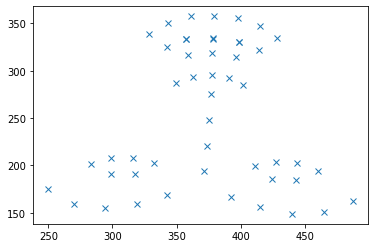

In [ ]:
Sequence1 = TabSequences[0]
visage1 = Sequence1[:,0,:]
plt.plot(visage1[:,0],visage1[:,1],'x' )
plt.show()

**Pre-process data**
Put the landmark coordinates into one dimension (98) then pad the sequences to the maximum size of them (maximum number of frames). Is this padding mandatory or only advantageous if we use CNN based classifier (see exercise 1) and LSTM-based one.

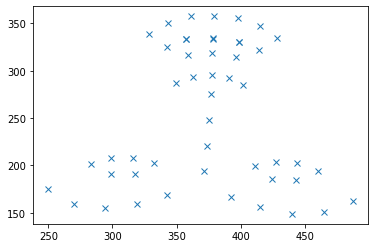

(98, 11)

In [ ]:
for i in range(0,326):
  Sequence = TabSequences[i]
  SeqReshaped = Sequence1.reshape(98,11)
sequence
tf.keras.preprocessing.sequence.pad_sequences(sequence)

Sequence1 = TabSequences[0]
SeqReshaped = Sequence1.reshape(98,11)
SeqReReshaped = SeqReshaped.reshape(49,11,2)
visage1 = SeqReReshaped[:,0,:]
plt.plot(visage1[:,0],visage1[:,1],'x' )
plt.show()
SeqReshaped.shape

**Classification using CNN**
Perform classification using a 1D-CNN the 2D-CNN with the same parameters used in exercise 1 (keep the same parameters for both convolutions for fair comparison). 

In [ ]:
# 1D-CNN model here

In [ ]:
# 2D-CNN model here

**Classification using RNN**
Use an RNN model (you can use the one proposed in exercice 1) to perform classifciation based on a vanilla RNN

In [ ]:
# RNN model here

**LSTM-based classification**
Perform the classification using a LSTM (you can use the one proposed in exercice 1)

In [ ]:
# LSTM model here

**CNN+LSTM for better classification**
Finally perform a classification based on CNN and LSTM to outperform the previous models

In [ ]:
# your code here

**Bonus**
The padding adds null values, in order to check whether we did a good strategy, use interpolation between landmarks of successive frames inorder to generate sequences with same number of frames, you can use linear or spline-based interpolation.

In [ ]:
# Interpolation code here

Perform the training and evaluate the performance of the models above after interpolation and compare the results comparing to padding.

In [ ]:
# CNN 1-D with interpolated data
# your code here

In [ ]:
# CNN 2-D with interpolated data
# your code here

In [ ]:
# RNN with interpolated data
# your code here

In [ ]:
# LSTM with interpolated data
# your code here

In [ ]:
# CNN + LSTM with interpolated data
# your code here